<a href="https://colab.research.google.com/github/Jeyani11/ML_project_1/blob/main/MAGIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#!pip install sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler # Object to over-sample the minority
                                                     # class(es) by picking samples at random
                                                     # with replacement. The bootstrap can be
                                                     # generated in a smoothed manner.

Data are MC generated to simulate registration of high energy gamma particles in an atmospheric Cherenkov telescope


In [18]:
cols = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv("magic04.data",names=cols) #give the name to the columns on the dataset + df is the panda dataframe
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [19]:
df["class"].unique() #in the class column there is only 'g' and 'h' values for gamma and hadrons but computer prefer 0 and 1 instead of letters

array(['g', 'h'], dtype=object)

In [20]:
df["class"] = (df["class"] == "g").astype(int) #The astype() method returns a new DataFrame where the data types has been changed to the specified type here int
#if df["class"][0] == g then it will transform into 1

Each sample has a value for each column and now we're trying to find for each sample is a gamma or a hadron. For this data we have 10 diffrent features to classify if the point is a gamma or a hadron.

**SUPERVISED LEARNING**
We have the result to predict in the dataset
We have the chocolate bar X|Y : feature matrix|label value

In the chocolate bar we cut it into a training dataset, validation dataset (model can handle unseen data + the loss is never feed back in the model) and a testing dataset.

In [21]:
df.head()


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


Plot a histogramm for each feature according to if it's a gamma or a hadron (look if a feature or more affect the class)


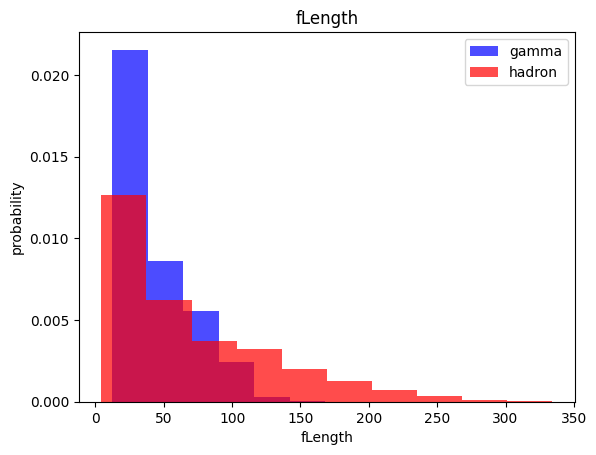

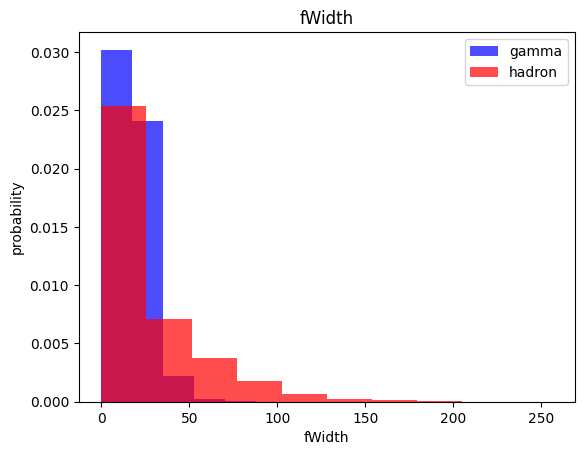

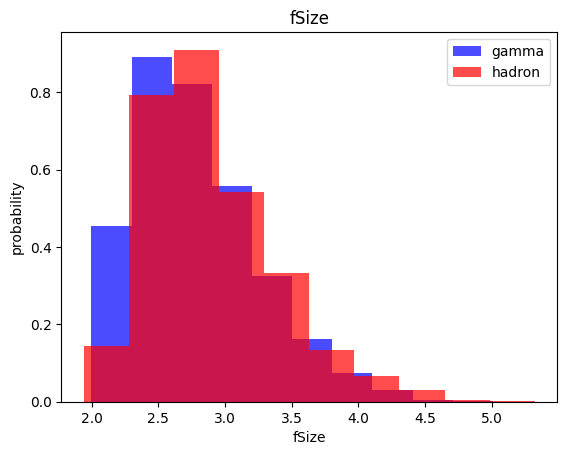

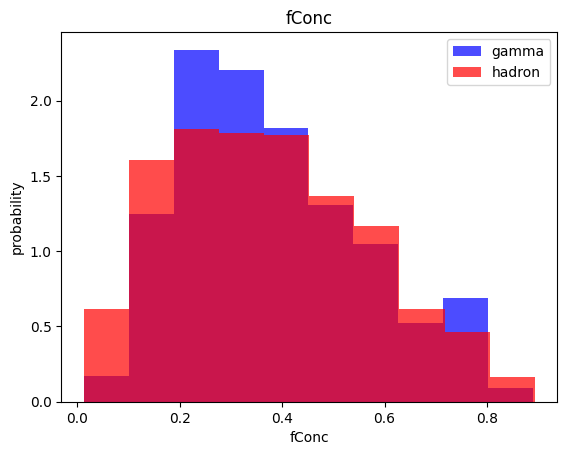

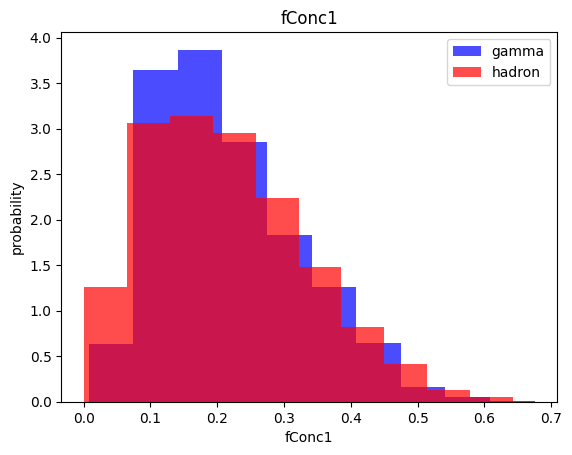

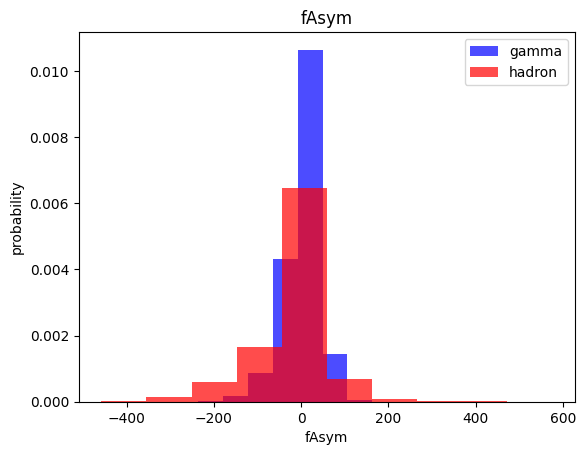

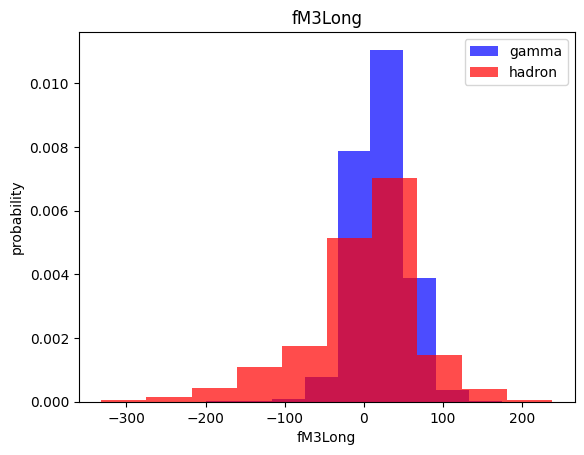

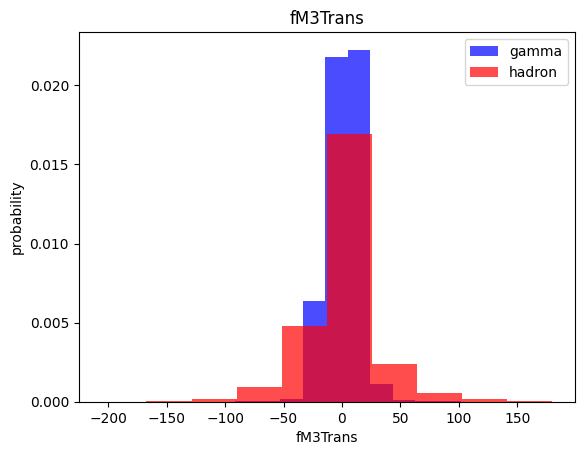

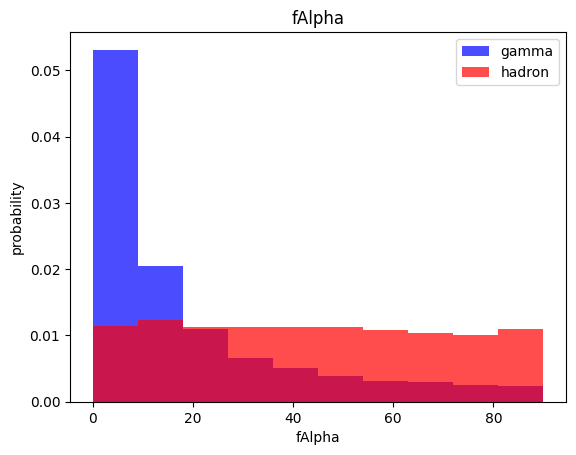

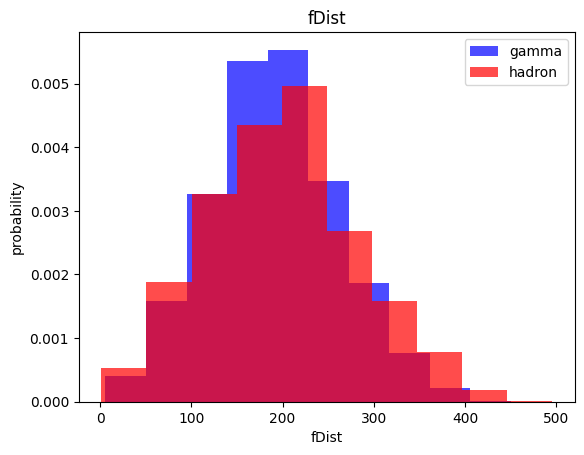

In [22]:
for feature in cols[:-1]:
  plt.hist(df[df["class"]==1][feature],color='blue', label='gamma', alpha = 0.7, density=True) #alpha is the transparency, density normalize the histogramm to allow comparison
  plt.hist(df[df["class"]==0][feature],color='red', label='hadron', alpha = 0.7, density=True)
  plt.title(feature)
  plt.ylabel("probability")
  plt.xlabel(feature)
  plt.legend()
  plt.show()

**Train,validation and test datasets**

In [23]:
train, valid, test = np.split(df.sample(frac = 1), [int(0.6*len(df)),int(0.8*len(df))]) # Everything between 60% and 80% will go to the validation
#split divide array into subarray
#sample() method returns a specified number of random rows

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


As we can see in the the datasets the scale of these values is way of for example `fWidth` is in the hundreds while `fConc` is in the 0.001 and that can affect our results.
So we scale the values so it will be relatives to the mean and the standard deviation of these columns.

In [32]:
def scale_dataset(dataframe, oversample = False):
  X = dataframe[dataframe.columns[:-1]].values #get the values of everything except the last columns
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X) #take X and fit the standard scaler to X and transform those values  and what it would be


  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X,y) # take more of the less class and sample from there to increase the size of the dataset
  #make a 2-D numpy array
  data = np.hstack((X,np.reshape(y,(-1,1)))) #Stack horizontally 2 arrays not one above each other
  # the -1,1 makes it a 2-D array and the -1 infers the dimention of what it should have been so
  return data, X,y

In [25]:
train

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
8517,26.7120,20.8295,2.7931,0.3752,0.2134,22.1951,22.0373,10.0754,44.0120,196.3320,1
1262,21.8249,19.6503,2.5391,0.4624,0.2818,15.8985,15.8921,-18.5167,33.9020,125.9640,1
11645,83.9360,34.3769,3.6205,0.1982,0.1396,-52.3990,53.6893,-20.6941,0.8126,309.1200,1
5302,63.0359,15.7418,3.2057,0.1818,0.0931,-0.0722,49.2069,-6.9608,1.9109,187.2490,1
224,20.6830,7.2158,2.0233,0.7014,0.3649,-1.1217,7.9330,-5.9330,56.9230,137.9800,1
...,...,...,...,...,...,...,...,...,...,...,...
12561,18.8081,10.8706,2.2350,0.6902,0.4476,3.7371,-4.2867,9.0518,14.6227,218.0525,0
14902,31.0359,11.1013,2.6186,0.4236,0.2323,-31.0017,21.2969,6.1501,86.4242,117.3060,0
1884,63.7982,31.2915,3.7966,0.1372,0.0721,45.8244,53.5567,-13.3246,0.6806,201.3660,1
15725,32.7243,11.9393,2.6325,0.4266,0.2692,20.0343,25.9423,11.1904,54.5812,107.9050,0


In [26]:
print(len(train[train["class"]==1])) # number of gamma 7436 before over sample
print(len(train[train["class"]==0])) #number of hadron 3976 before over sample

7407
4005


As you can see there's a lot more gamma than hadrons and that can cause a problem in detecting hadrons. So we want to oversample our training dataset. So we want to increase the number of the values where `["class"] == 0`

In [43]:
train, X_train, y_train = scale_dataset(train, oversample=True)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [28]:
len(y_train)

14814

In [29]:
sum(y_train== 0) #the  over sample is successful

np.int64(7407)

In [30]:
sum(y_train== 1)

np.int64(7407)

In [38]:
#train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

Now our data is properly formatted, we're going on to different models.

# K-nearest neighbors

Data has samples so you can do a **classification**, here it's binary.
Here we're using the euclidian distance : sqrt((x1 - x2)**2 + (y1 - y2)**2)

Usully we use k = 3 or 5.

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn_model = KNeighborsClassifier(n_neighbors= 3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Prediction

In [39]:
y_pred = knn_model.predict(X_test)

In [58]:
y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [57]:
y_test

array([0, 1, 1, ..., 0, 0, 1])

As we can see there's some erreur with the y predicted and the y test.

Let's look at the classifier report given by sklearn

In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.41      0.52      1348
           1       0.74      0.91      0.82      2456

    accuracy                           0.73      3804
   macro avg       0.73      0.66      0.67      3804
weighted avg       0.73      0.73      0.71      3804



Accuracy = 81% right /total dataset
precision says. Out of all the data from class 0 we have a 67 % recall and a 78 % precision.
The f1 score is a mix of precision and recall and we will focus on this because we have an unbalanced test dataset.

Precision is out of the label that we have labelled as positive hom many are truly positive. Recall is out of all the data that are truly positive how many are actually positive.

# Naive Bayes
Using probability (given that)

## **Bayes rule**
**P(A|B) = (P(B|A) x P(A))/P(B)**

We adapt it for machine learning.
We have the different categories Ck and the feature vector x.

P(Ck|x) = (P(x|Ck) x P(Ck))/P(x)

**Posterior = likelihood x prior / evidence**
**Posterior** : the probability that it is from this class (categorie)  with all the evidence (feature).

**Likelihood** : Assume that this is this class what is the likelihood of seeing this feature in this class

**Prior** : In the entire population of things what is the probability of this class in general

**Evidence** : We're changing the prior we're creating this new posterior probability built upon the prior using some sort of evidence = probability of the future

### P(Ck|x1,x2,...,xn) α P(Ck) ∏ P(xi|Ck)
α : proportional to

=>
P(Ck|x1,x2,...,xn) = P(x1,x2,...,xn|Ck) x P(Ck)/P(x1,...,xn)

And because P(x1,..,xn) doesn't depend on the category, we can say that :     
P(Ck,x1,x2,...,xn) α P(x1,x2,...,xn|Ck) x P(Ck).

In Naive Bayes we assume that all the features are independant , so we can write:
P(x1,x2,...,xn|Ck) = P(x1|Ck) x P(x2|Ck) x... x P(xn|Ck).

So P(Ck,x1,x2,...,xn) α P(x1|Ck) x P(x2|Ck) x... x P(xn|Ck) x P(Ck) ==> gives the formula in **bold**.


ŷ = predicted y = argmax (k = 1,...,n) { P(Ck|x1,x2,...,xn)} = argmax (k = 1,...,n) {P(Ck) ∏ P(xi|Ck)}

In [44]:
from sklearn.naive_bayes import GaussianNB

In [45]:
nb_model = GaussianNB()
nm_model = nb_model.fit(X_train, y_train)

In [50]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.41      0.52      1348
           1       0.74      0.91      0.82      2456

    accuracy                           0.73      3804
   macro avg       0.73      0.66      0.67      3804
weighted avg       0.73      0.73      0.71      3804



Accuracy is 72% but not good.

# Linear Regression
Not classification, so we have a model ŷ = mx + b but we want to model the probability of it being a hadron p = mx + b . But the problem is that in the regression it goes form minus infinity to infinity. So that's why instead of modeling a probability we model a ratio : $$\frac{p}{1-p} = mx + b$$ (it takes infinity values). But mx +b can still be negative and not the ratio. That's why we take the ln(p/(1-p) = mx + b, which you can remove by taking the exp.

$$e^{ln(\frac{p}{1-p})} = e^{mx + b}$$

$$p = (1 - p).e^{mx + b}$$
$$p = e^{mx +b}-p.e^{mx+b}$$

$$p.(1 + e^{mx+b}) = e^{mx +b}$$

$$p = \frac{e^{mx +b}}{(1 + e^{mx +b})}$$

But I want a 1 on top of the fraction so we multiply by exp(-(mx+b)) which will give me a sigmoid function.

$$ p = \frac{e^{mx +b}}{1 + e^{mx +b}} .\frac{e^{-(mx +b)}}{e^{-(mx +b))}}$$
Which gives:
$$ p = \frac{1}{1 + e^{-(mx+b)}} $$
Pretty similar to a sigmoid function:

$$ S(y) = \frac{1}{1+e^{⁻y}}$$ that has its value between 0 and 1. And fit our data a lot better. (See image of the course).

That works if we only have one feature : **simple logistic regression**

In [51]:
from sklearn.linear_model import LogisticRegression

In [53]:
logistic_regression_model = LogisticRegression()
logistic_regression_model = logistic_regression_model.fit(X_train, y_train)

In [56]:
y_pred = logistic_regression_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71      1348
           1       0.85      0.82      0.84      2456

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.77      3804
weighted avg       0.79      0.79      0.79      3804



Perform better than Naive Bayes but still worse than KNN.

# Support Vector Machines (SVM)
Find the hyperplane that best seperate the classes.